In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
dataset = pd.read_csv("./datasets/cardekho_imputated.csv")
df = dataset
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [4]:
df.shape

(15411, 14)

In [5]:
df.isnull().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
# removing not neccessary columns
df.drop(columns=['Unnamed: 0', "car_name", "brand"], axis=1, inplace=True)

In [8]:
df.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [9]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


<Axes: >

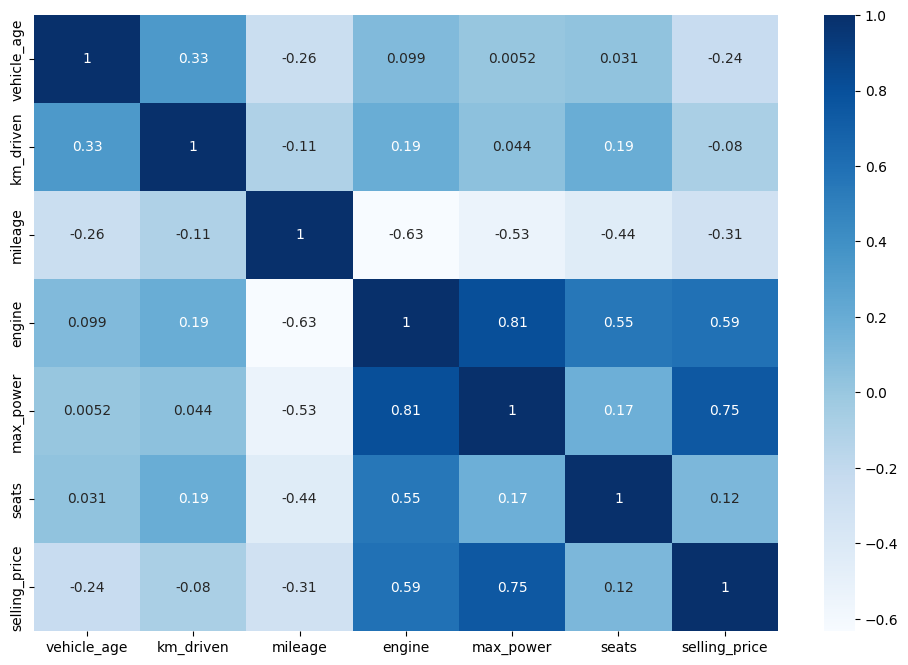

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')

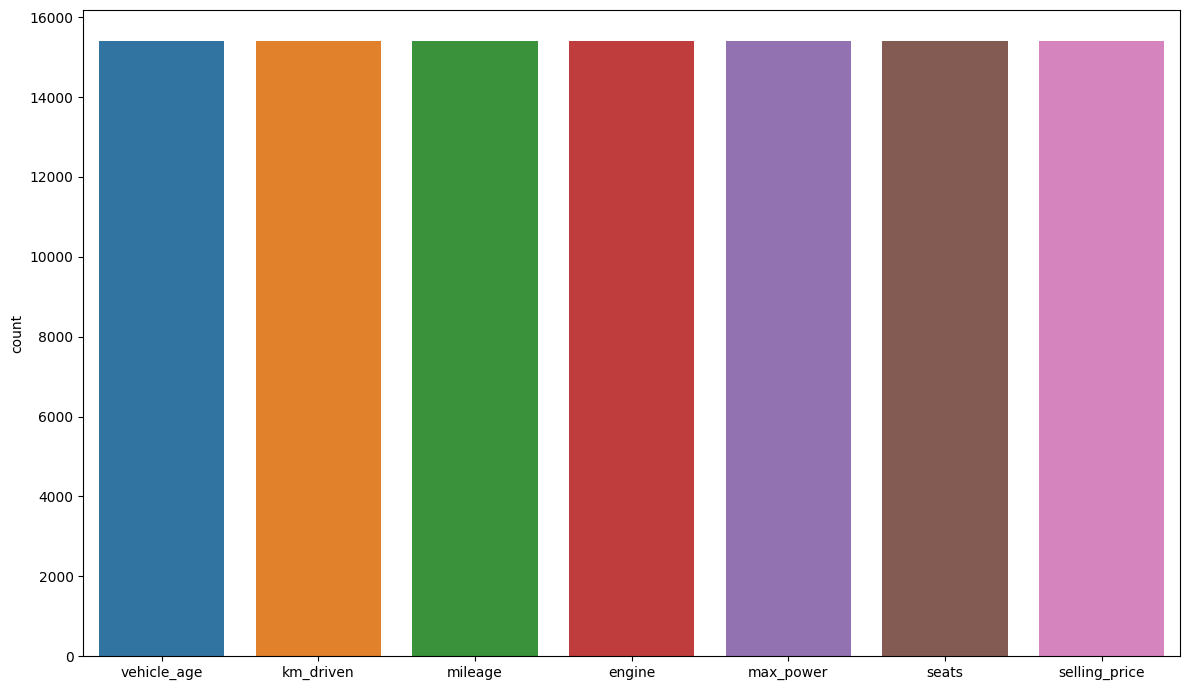

In [11]:
plt.figure(figsize=(12,7))
sns.countplot(data=df)
plt.tight_layout()

In [12]:
df.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


<Axes: xlabel='fuel_type', ylabel='count'>

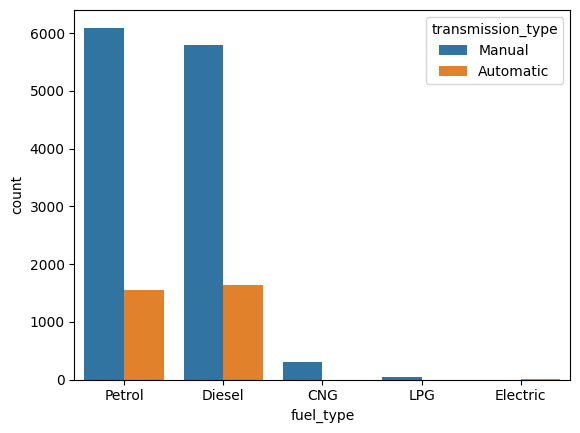

In [13]:
sns.countplot(x='fuel_type', hue='transmission_type', data=df)

In [14]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']
X

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5
...,...,...,...,...,...,...,...,...,...,...
15406,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5
15407,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7
15408,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5
15409,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7


In [15]:
df['model'].unique()

array(['Alto', 'Grand', 'i20', 'Ecosport', 'Wagon R', 'i10', 'Venue',
       'Swift', 'Verna', 'Duster', 'Cooper', 'Ciaz', 'C-Class', 'Innova',
       'Baleno', 'Swift Dzire', 'Vento', 'Creta', 'City', 'Bolero',
       'Fortuner', 'KWID', 'Amaze', 'Santro', 'XUV500', 'KUV100', 'Ignis',
       'RediGO', 'Scorpio', 'Marazzo', 'Aspire', 'Figo', 'Vitara',
       'Tiago', 'Polo', 'Seltos', 'Celerio', 'GO', '5', 'CR-V',
       'Endeavour', 'KUV', 'Jazz', '3', 'A4', 'Tigor', 'Ertiga', 'Safari',
       'Thar', 'Hexa', 'Rover', 'Eeco', 'A6', 'E-Class', 'Q7', 'Z4', '6',
       'XF', 'X5', 'Hector', 'Civic', 'D-Max', 'Cayenne', 'X1', 'Rapid',
       'Freestyle', 'Superb', 'Nexon', 'XUV300', 'Dzire VXI', 'S90',
       'WR-V', 'XL6', 'Triber', 'ES', 'Wrangler', 'Camry', 'Elantra',
       'Yaris', 'GL-Class', '7', 'S-Presso', 'Dzire LXI', 'Aura', 'XC',
       'Ghibli', 'Continental', 'CR', 'Kicks', 'S-Class', 'Tucson',
       'Harrier', 'X3', 'Octavia', 'Compass', 'CLS', 'redi-GO', 'Glanza',
       

In [16]:
y

0         120000
1         550000
2         215000
3         226000
4         570000
          ...   
15406     250000
15407     925000
15408     425000
15409    1225000
15410    1200000
Name: selling_price, Length: 15411, dtype: int64

In [17]:
label_encoder = LabelEncoder()
X['model'] = label_encoder.fit_transform(X['model'])

In [18]:
num_columns = X.select_dtypes(exclude='object').columns
cat_columns = ['seller_type', 'fuel_type', 'transmission_type']

In [19]:
pre_processor = ColumnTransformer([

    (['cat', OneHotEncoder(), cat_columns]),
    (['num', StandardScaler(), num_columns])

], remainder='passthrough'
)
X = pre_processor.fit_transform(X)

In [20]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.519714,0.983562,1.247335,-0.000276,-1.324259,-1.263352,-0.403022
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.225693,-0.343933,-0.690016,-0.192071,-0.554718,-0.432571,-0.403022
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.536377,1.647309,0.084924,-0.647583,-0.554718,-0.479113,-0.403022
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.519714,0.983562,-0.360667,0.292211,-0.936610,-0.779312,-0.403022
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.666211,-0.012060,-0.496281,0.735736,0.022918,-0.046502,-0.403022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.508844,0.983562,-0.869744,0.026096,-0.767733,-0.757204,-0.403022
15407,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.556082,-1.339555,-0.728763,-0.527711,-0.216964,-0.220803,2.073444
15408,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.407551,-0.012060,0.220539,0.344954,0.022918,0.068225,-0.403022
15409,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.426247,-0.343933,72.541850,-0.887326,1.329794,0.917158,2.073444


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print("training dataset performance")
print("- r2_score :", r2_score(y_train, y_train_pred))
print('- mean_squared_error :', mean_squared_error(y_train, y_train_pred))
print('- mean_absolute_error :', mean_absolute_error(y_train, y_train_pred))
print('- root_mean_squared_error :', root_mean_squared_error(y_train, y_train_pred))

print("\n")

print("Test dataset performance")
print("- r2_score :", r2_score(y_test, y_test_pred))
print('- mean_squared_error :', mean_squared_error(y_test, y_test_pred))
print('- mean_absolute_error :', mean_absolute_error(y_test, y_test_pred))
print('- root_mean_squared_error :', root_mean_squared_error(y_test, y_test_pred))

training dataset performance
- r2_score : 0.9745756280365068
- mean_squared_error : 20505162837.248383
- mean_absolute_error : 39712.17847765518
- root_mean_squared_error : 143196.23890748102


Test dataset performance
- r2_score : 0.9239492756151418
- mean_squared_error : 59147350933.03906
- mean_absolute_error : 105537.66317277757
- root_mean_squared_error : 243202.28397989823


In [23]:
# training and testing the dataset on multiple regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

models = {

    "linear" : LinearRegression(),
    "ridge" : Ridge(),
    "lasso" : Lasso(),
    'knn' : KNeighborsRegressor(),
    "dt" : DecisionTreeRegressor(),
    "rf" : RandomForestRegressor()
}


In [24]:
for i in range(len(models)):

    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f'---------- {list(models.values())[i]} ----------')

    print("training dataset performance")
    print("- r2_score :", r2_score(y_train, y_train_pred))
    print('- mean_squared_error :', mean_squared_error(y_train, y_train_pred))
    print('- mean_absolute_error :', mean_absolute_error(y_train, y_train_pred))
    print('- root_mean_squared_error :', root_mean_squared_error(y_train, y_train_pred))

    print("Test dataset performance")
    print("- r2_score :", r2_score(y_test, y_test_pred))
    print('- mean_squared_error :', mean_squared_error(y_test, y_test_pred))
    print('- mean_absolute_error :', mean_absolute_error(y_test, y_test_pred))
    print('- root_mean_squared_error :', root_mean_squared_error(y_test, y_test_pred))

    print('---------------------------------')
    print("\n")

---------- LinearRegression() ----------
training dataset performance
- r2_score : 0.6219679126614084
- mean_squared_error : 304888927825.3649
- mean_absolute_error : 266381.6812597335
- root_mean_squared_error : 552167.4816804816
Test dataset performance
- r2_score : 0.6522725171097756
- mean_squared_error : 270440020472.24942
- mean_absolute_error : 283969.1385933039
- root_mean_squared_error : 520038.47979957156
---------------------------------


---------- Ridge() ----------
training dataset performance
- r2_score : 0.6219851109888981
- mean_squared_error : 304875057099.0315
- mean_absolute_error : 266636.3543401818
- root_mean_squared_error : 552154.921284807
Test dataset performance
- r2_score : 0.6524837726692978
- mean_squared_error : 270275719516.31934
- mean_absolute_error : 284244.2149302949
- root_mean_squared_error : 519880.4858006495
---------------------------------


---------- Lasso() ----------
training dataset performance
- r2_score : 0.6219860252409328
- mean_squar

## Hyper parameter Tuning

In [25]:
rf_params = {

    "n_estimators" : [50,100,150,200],
    "criterion" : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    "max_features" : ['sqrt', 'log2'],
    "max_depth" : [1,2,3,4,5,6,7,8,9,10,11,15],

}
rf_params

{'n_estimators': [50, 100, 150, 200],
 'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
 'max_features': ['sqrt', 'log2'],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15]}

In [26]:
from sklearn.model_selection import RandomizedSearchCV

random_cv_models = [
    ('random forest', RandomForestRegressor(), rf_params)
]
random_cv_models

[('random forest',
  RandomForestRegressor(),
  {'n_estimators': [50, 100, 150, 200],
   'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
   'max_features': ['sqrt', 'log2'],
   'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15]})]

In [27]:

model_params = {}
for name, model, params in random_cv_models:
    random_cv = RandomizedSearchCV(estimator=model,
                       param_distributions=params,
                       scoring="neg_mean_squared_error",
                       n_jobs=-1,
                       refit=True,
                       cv=5)
    
    random_cv.fit(X_train, y_train)
    model_params[name] = random_cv.best_params_

model_params
    

{'random forest': {'n_estimators': 150,
  'max_features': 'log2',
  'max_depth': 11,
  'criterion': 'poisson'}}

## Retrain the model using the best hyper parameters

In [29]:
model = RandomForestRegressor(n_estimators=150, criterion="poisson", max_depth=11,max_features="log2")
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print("training dataset performance")
print("- r2_score :", r2_score(y_train, y_train_pred))
print('- mean_squared_error :', mean_squared_error(y_train, y_train_pred))
print('- mean_absolute_error :', mean_absolute_error(y_train, y_train_pred))
print('- root_mean_squared_error :', root_mean_squared_error(y_train, y_train_pred))

print("\n")

print("Test dataset performance")
print("- r2_score :", r2_score(y_test, y_test_pred))
print('- mean_squared_error :', mean_squared_error(y_test, y_test_pred))
print('- mean_absolute_error :', mean_absolute_error(y_test, y_test_pred))
print('- root_mean_squared_error :', root_mean_squared_error(y_test, y_test_pred))

training dataset performance
- r2_score : 0.9608654796054793
- mean_squared_error : 31562616940.922413
- mean_absolute_error : 82205.41932829232
- root_mean_squared_error : 177658.7091614774


Test dataset performance
- r2_score : 0.9211299692490384
- mean_squared_error : 61340025682.32616
- mean_absolute_error : 110962.95948675288
- root_mean_squared_error : 247669.18597662923
